# Your title for your regression project

## Project Planning

### Goals

(see background)...your customer is the zillow data science team.  state your goals as if you were delivering this to zillow.  They have asked for something from you (see 'background') and you are basically communicating in a more concise way, and very clearly, the goals as you understand them and as you have taken and acted upon through your research. 

*Project Overview
Background:
Zillow wants to improve their Zestimate. The zestimate is estimated value of a home. Zillow theorizes that there is more information to be gained to improve its existing model. Because of that, Zillow wants you to develop a model to predict the error between the Zestimate and the sales price of a home. In predicting the error, you will discover features that will help them improve the Zestimate estimate itself. Your goal of this project is to develop a linear regression model that will best predict the log error of the Zestimate. The error is the difference of the sales price and the Zestimate. The log error is computed by taking the log function of that error. You don't need to worry about the fact that the error is of a logarithmic function. It is a continuous number that represents an error rate.*



### Deliverables

What should the zillow team expect to receive from you?  Again, as you were communicating to them, not to your instructors.  

*your deliverables:*
1. *A report (in the form of a presentation, both verbal and through a slides) that summarizes your findings about the drivers of the Zestimate error. This will come from the analysis you do during the exploration phase of the pipeline. In the report, you will have charts that visually tell the story of what is driving the errors.*

2. *A Jupyter notebook, titled 'Regression_Proj_YourName', that contains a clearly labeled section and code clearly documented for each the stages below (project planning, data acquisition, data prep, exploration, and modeling). All of the work will take place in your jupyter notebook.*

### Data Dictionary & Details

**we will be using 2016 data so do NOT use properties_2017 or predictions_2017**  

Data dictionary of fields you will use. Why? So that you can refer back and others can refer to the meanings as you are developing your model. This is about gaining knowledge in the domain space so that you will understand when data doesn't look right, be able to more effectively develop hypotheses, and use that domain knowledge to build a more robust model (among other reasons)

Define your fields.   You may be able to to some ahead of time, but you may need to return to this section after you have explored the data and understand more about what each field means.  Also, look for a data dictionary either in the database or in the original data source (kaggle.com). 

You are free to use more fields than is mentioned, but I would recommend not expanding it to too many fields in the beginning as it will add complexity and you want to make sure you get an initial version completed before diving in deeper.  

- logerror
- bathroomcnt
- bedroomcnt
- calculatedfinishedsquarefeet
- fullbathcnt
- garagecarcnt
- roomcnt
- yearbuilt
- taxvaluedollarcnt
- taxamount

### Initial Thoughts, Ideas, Hypotheses

Brainstorming ideas, hypotheses, related to how variables might impact or relate to each other, both within independent variables and between the independent variables and dependent variable, and also related to any ideas for new features you may have while first looking at the existing variables and challenge ahead of you.

### Prepare your environment

import libraries you will use throughout the project.  You may need to add to this as you go.  But try to keep all of your imports in this section

In [1]:
import env

from helper import get_price_bin
from helper import bin_from_diff

from math import fabs

import pandas as pd

import scipy.stats as stats

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('classic')

import statsmodels.api as sm

from scipy.stats import pearsonr

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, median_absolute_error
from sklearn.feature_selection import f_regression

### Data Acquisition

#### Acquire via csv

- add the path to where your files are located in your env.py file. 
- ensure that others can read the files based on their local env.py file. 

- Filter out any from predictions_2016 that do not have a logerror. 
- Generate a cohesive data set that includes the following fields:

- `logerror`
- `bathroomcnt`
- `bedroomcnt`
- `calculatedfinishedsquarefeet`
- `fullbathcnt`
- `garagecarcnt`
- `roomcnt`
- `yearbuilt`
- `taxvaluedollarcnt`
- `taxamount`
- (optional) `regionidzip`

recommendations for dealing with the large dataset
- remove any without a logerror
- sample until you have the right query (and then pull entire dataset)
- export to local csv 
- read from local csv (sample, but larger sample than your first) 
- save sql query to add into to_sql() function in python. 


#### Summarize the data. 

Why? So you can confirm the data look like what you would expect.

- peek at a few rows
- data types
- summary stats
- column names
- number of rows and columns
- ...

In [2]:
path = env.path
properties = pd.read_csv(path + 'properties_2016.csv')
predictions = pd.read_csv(path + 'train_2016_v2.csv')


/usr/local/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (22,32,34,49,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df = properties.set_index('parcelid').join(predictions.set_index('parcelid'), how='inner')

In [4]:
df.head()


,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,finishedfloor1squarefeet,...,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock,logerror,transactiondate
parcelid,,,,,,,,,,,,,,,,,,,,,
10711738,1.0,NaN,NaN,3.0,4.0,NaN,4.0,3.0,NaN,NaN,...,245180.0,567112.0,2015.0,321932.0,7219.18,NaN,NaN,6.037113e+13,0.0276,2016-08-02
10711755,1.0,NaN,NaN,3.0,3.0,NaN,4.0,3.0,NaN,NaN,...,254691.0,459844.0,2015.0,205153.0,6901.09,NaN,NaN,6.037113e+13,-0.0182,2016-08-02
10711805,1.0,NaN,NaN,2.0,3.0,NaN,4.0,2.0,NaN,NaN,...,235114.0,384787.0,2015.0,149673.0,4876.61,NaN,NaN,6.037113e+13,-0.1009,2016-05-03
10711816,1.0,NaN,NaN,2.0,4.0,NaN,4.0,2.0,NaN,NaN,...,262309.0,437176.0,2015.0,174867.0,5560.07,NaN,NaN,6.037113e+13,-0.0121,2016-04-05
10711858,1.0,NaN,NaN,2.0,4.0,NaN,4.0,2.0,NaN,NaN,...,232037.0,382055.0,2015.0,150018.0,4878.25,NaN,NaN,6.037113e+13,-0.0481,2016-07-15


### Data Preparation

Goal: leave this section with a dataset that is ready to be analyzed. 

In [5]:
df = df[['logerror', 'bathroomcnt', 'bedroomcnt', 'calculatedfinishedsquarefeet', 'fullbathcnt', 'garagecarcnt', 'roomcnt', 'yearbuilt', 'taxvaluedollarcnt', 'taxamount']]
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 90275 entries, 10711738 to 162960842
Data columns (total 10 columns):
logerror                        90275 non-null float64
bathroomcnt                     90275 non-null float64
bedroomcnt                      90275 non-null float64
calculatedfinishedsquarefeet    89614 non-null float64
fullbathcnt                     89093 non-null float64
garagecarcnt                    29937 non-null float64
roomcnt                         90275 non-null float64
yearbuilt                       89519 non-null float64
taxvaluedollarcnt               90274 non-null float64
taxamount                       90269 non-null float64
dtypes: float64(10)
memory usage: 7.6 MB


#### Identify the columns that have missing values and the number of missing values in each column. 
Why? Missing values are going to cause issues down the line so you will need to handle those appropriately. For each variable with missing values, if it makes sense to replace those missing with a 0, do so. For those where that doesn't make sense, decide if you should drop the entire observations (rows) that contain the missing values, or drop the entire variable (column) that contains the missing values.

Noting from our info on the initial dataframe, we see that our garagecarcnt column is filled only by a 1/3 ratio of the entire data set.  It would be largely unknowable to fill the rest of this column with data, so I have deemed it unusable in this instance and will drop the column for the time-being.  The other null entries in our columns have less than 2% of data missing at most, and I find it most pragmatic to merely drop the rows in this instance.

In [6]:
df.drop(columns='garagecarcnt', inplace = True)

In [7]:
df.dropna(axis=0, how='any', inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88998 entries, 10711738 to 162960842
Data columns (total 9 columns):
logerror                        88998 non-null float64
bathroomcnt                     88998 non-null float64
bedroomcnt                      88998 non-null float64
calculatedfinishedsquarefeet    88998 non-null float64
fullbathcnt                     88998 non-null float64
roomcnt                         88998 non-null float64
yearbuilt                       88998 non-null float64
taxvaluedollarcnt               88998 non-null float64
taxamount                       88998 non-null float64
dtypes: float64(9)
memory usage: 6.8 MB


In [8]:
#Using sorting to remove inplausible outliers: 
# bed/bath values with sqft too small to accomodate
# property assessments that are the price of a meal
df.sort_values(by = 'calculatedfinishedsquarefeet')
df = df[df.calculatedfinishedsquarefeet > 155]
df.sort_values(by = 'taxvaluedollarcnt')
df = df[df.taxvaluedollarcnt > 5000]
df.sort_values(by = 'taxvaluedollarcnt')
df.sort_values(by = 'yearbuilt')

,logerror,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fullbathcnt,roomcnt,yearbuilt,taxvaluedollarcnt,taxamount
parcelid,,,,,,,,,
11764365,0.0325,1.0,2.0,736.0,1.0,0.0,1885.0,233500.0,2123.25
12883734,0.0478,1.0,2.0,756.0,1.0,0.0,1885.0,235614.0,3069.50
11778471,0.1222,3.0,6.0,2953.0,3.0,0.0,1885.0,529254.0,6899.32
12171626,-0.0305,1.0,5.0,3340.0,1.0,0.0,1885.0,708373.0,8478.10
12105155,0.1098,1.0,2.0,969.0,1.0,0.0,1885.0,29730.0,575.35
13032370,0.0000,1.0,2.0,1465.0,1.0,0.0,1885.0,37273.0,631.00
12650153,-0.0010,1.0,2.0,920.0,1.0,0.0,1886.0,31370.0,421.90
12958948,0.0080,2.0,4.0,2426.0,2.0,0.0,1887.0,287200.0,4377.48
11802554,-0.0976,1.0,4.0,2588.0,1.0,0.0,1888.0,426651.0,5423.32


In [9]:
df[df.roomcnt == 0].count()

logerror                        68482
bathroomcnt                     68482
bedroomcnt                      68482
calculatedfinishedsquarefeet    68482
fullbathcnt                     68482
roomcnt                         68482
yearbuilt                       68482
taxvaluedollarcnt               68482
taxamount                       68482
dtype: int64

In [10]:
summary = df.describe()
summary

,logerror,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fullbathcnt,roomcnt,yearbuilt,taxvaluedollarcnt,taxamount
count,88993.000000,88993.000000,88993.000000,88993.000000,88993.000000,88993.000000,88993.000000,8.899300e+04,88993.000000
mean,0.011443,2.308710,3.069612,1768.417505,2.240693,1.495039,1968.584844,4.576148e+05,5972.910552
std,0.158212,0.973797,1.109416,923.704678,0.960686,2.830576,23.766493,5.533956e+05,6804.212417
min,-4.605000,1.000000,0.000000,199.000000,1.000000,0.000000,1885.000000,7.704000e+03,49.080000
25%,-0.025300,2.000000,2.000000,1182.000000,2.000000,0.000000,1953.000000,2.004130e+05,2881.660000
50%,0.006000,2.000000,3.000000,1537.000000,2.000000,0.000000,1970.000000,3.436600e+05,4544.760000
75%,0.038300,3.000000,4.000000,2089.000000,3.000000,0.000000,1987.000000,5.405890e+05,6893.200000
max,4.737000,15.000000,16.000000,22741.000000,15.000000,18.000000,2015.000000,2.775000e+07,321936.090000


based on the description of the dataframe, there is clearly an issue with our room count integrity.  Let's explore it further:

In [11]:
df[df.roomcnt == 0].count()

logerror                        68482
bathroomcnt                     68482
bedroomcnt                      68482
calculatedfinishedsquarefeet    68482
fullbathcnt                     68482
roomcnt                         68482
yearbuilt                       68482
taxvaluedollarcnt               68482
taxamount                       68482
dtype: int64

68482 of our rows have zero rooms listed.  This may be possible for empty lots, but the vast majority of these properties are not.  We will disregard the column.

In [12]:
df.drop(columns='roomcnt', inplace = True)

In [13]:
summary = df.describe()
summary

,logerror,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fullbathcnt,yearbuilt,taxvaluedollarcnt,taxamount
count,88993.000000,88993.000000,88993.000000,88993.000000,88993.000000,88993.000000,8.899300e+04,88993.000000
mean,0.011443,2.308710,3.069612,1768.417505,2.240693,1968.584844,4.576148e+05,5972.910552
std,0.158212,0.973797,1.109416,923.704678,0.960686,23.766493,5.533956e+05,6804.212417
min,-4.605000,1.000000,0.000000,199.000000,1.000000,1885.000000,7.704000e+03,49.080000
25%,-0.025300,2.000000,2.000000,1182.000000,2.000000,1953.000000,2.004130e+05,2881.660000
50%,0.006000,2.000000,3.000000,1537.000000,2.000000,1970.000000,3.436600e+05,4544.760000
75%,0.038300,3.000000,4.000000,2089.000000,3.000000,1987.000000,5.405890e+05,6893.200000
max,4.737000,15.000000,16.000000,22741.000000,15.000000,2015.000000,2.775000e+07,321936.090000


tax amount clearly has some outliers, but we will leave them in  momentarily as they may well be accurate due to tax exemptions

In [14]:
summary.loc['iqr'] = summary.loc['75%']-summary.loc['25%']
summary

,logerror,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fullbathcnt,yearbuilt,taxvaluedollarcnt,taxamount
count,88993.000000,88993.000000,88993.000000,88993.000000,88993.000000,88993.000000,8.899300e+04,88993.000000
mean,0.011443,2.308710,3.069612,1768.417505,2.240693,1968.584844,4.576148e+05,5972.910552
std,0.158212,0.973797,1.109416,923.704678,0.960686,23.766493,5.533956e+05,6804.212417
min,-4.605000,1.000000,0.000000,199.000000,1.000000,1885.000000,7.704000e+03,49.080000
25%,-0.025300,2.000000,2.000000,1182.000000,2.000000,1953.000000,2.004130e+05,2881.660000
50%,0.006000,2.000000,3.000000,1537.000000,2.000000,1970.000000,3.436600e+05,4544.760000
75%,0.038300,3.000000,4.000000,2089.000000,3.000000,1987.000000,5.405890e+05,6893.200000
max,4.737000,15.000000,16.000000,22741.000000,15.000000,2015.000000,2.775000e+07,321936.090000
iqr,0.063600,1.000000,2.000000,907.000000,1.000000,34.000000,3.401760e+05,4011.540000


#### Create a variable, `colnames`, that is a list of the column names. 
Why? You will likely reference this variable later.

In [15]:
colnames = [col for col in df]
colnames

['logerror',
 'bathroomcnt',
 'bedroomcnt',
 'calculatedfinishedsquarefeet',
 'fullbathcnt',
 'yearbuilt',
 'taxvaluedollarcnt',
 'taxamount']

#### Identify the data types of each variable. Why? 
You need to make sure they are what makes sense for the data and the meaning of the data that lies in that variable. If it does not, make necessary changes.

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88993 entries, 10711738 to 162960842
Data columns (total 8 columns):
logerror                        88993 non-null float64
bathroomcnt                     88993 non-null float64
bedroomcnt                      88993 non-null float64
calculatedfinishedsquarefeet    88993 non-null float64
fullbathcnt                     88993 non-null float64
yearbuilt                       88993 non-null float64
taxvaluedollarcnt               88993 non-null float64
taxamount                       88993 non-null float64
dtypes: float64(8)
memory usage: 6.1 MB


#### Create a list of the independent variable names (aka attributes) and assign it to `x_vars` 
Why? During exploration, you will likely use this list to refer to the attribute names.

In [17]:
x_vars = colnames[1:]
x_vars

['bathroomcnt',
 'bedroomcnt',
 'calculatedfinishedsquarefeet',
 'fullbathcnt',
 'yearbuilt',
 'taxvaluedollarcnt',
 'taxamount']

#### Clearly identify your dependent (target) variable. 
- What is the name of the variable? 
- Is it discrete or continuous?

Our target variable is logerror.  It is continuousv(a log function applied to the residual of error in the zestimate)

#### View the distribution of the numeric variables
- plot a histogram and box plot of each variable. 
- Why? To see the distribution, skewness, outliers, and unit scales. You will use this information in your decision of whether to normalize, standardize or neither.

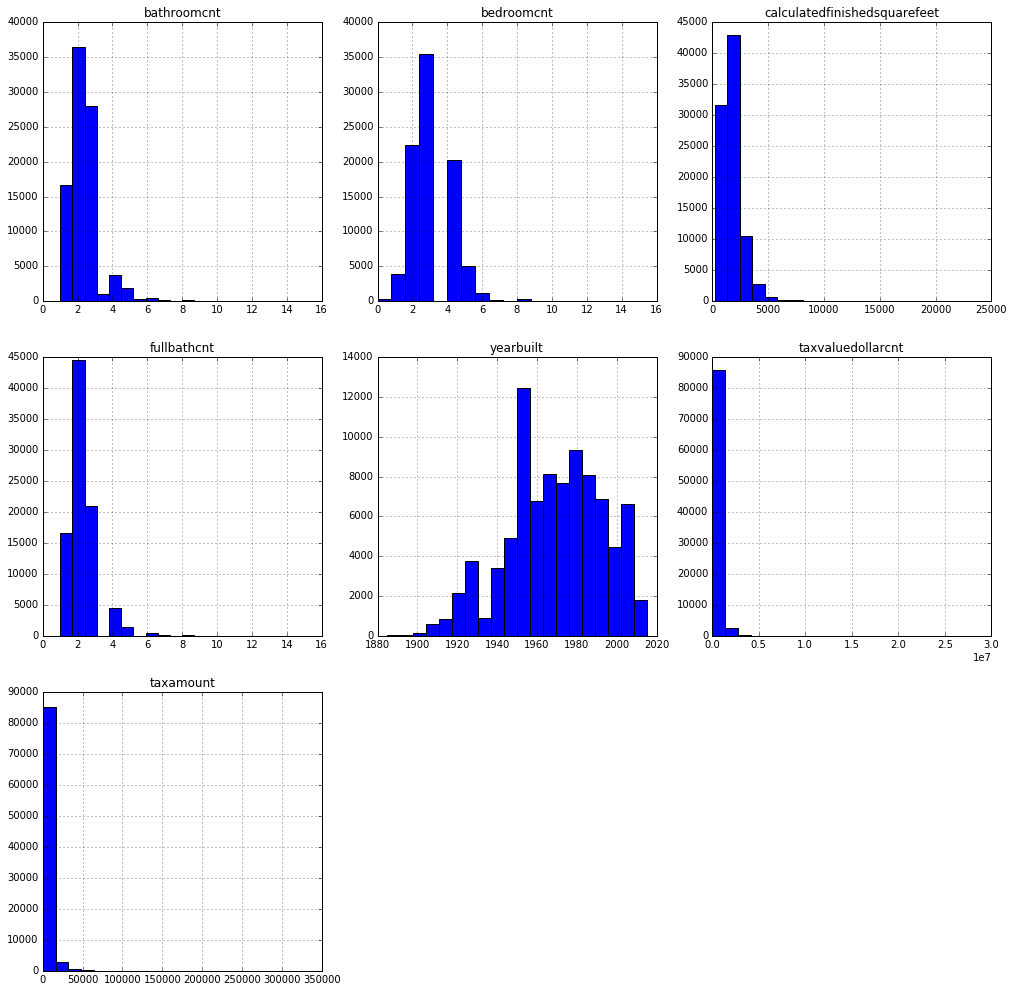

In [18]:
plt.figure(figsize=(17,17))
for i, col in enumerate(x_vars):
    plot_number = i+1
    series = df[col]
    plt.subplot(3, 3, plot_number)
    plt.title(col)
    series.hist(bins=20, density=False, cumulative=False, log=False)
    


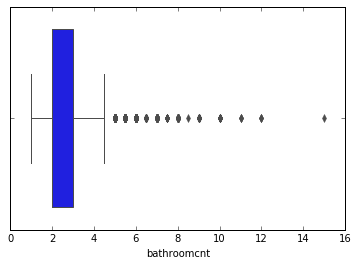

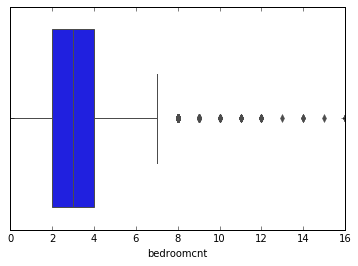

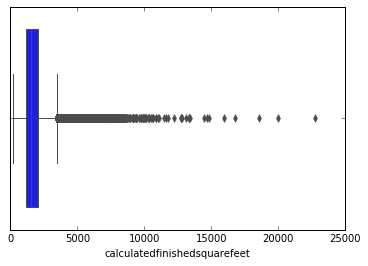

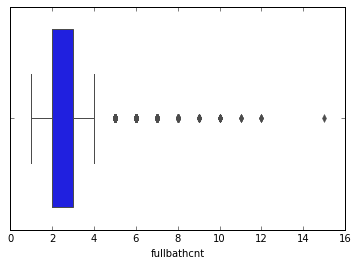

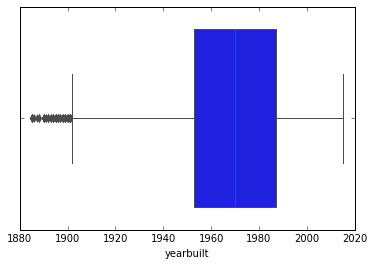

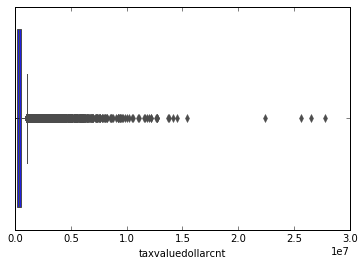

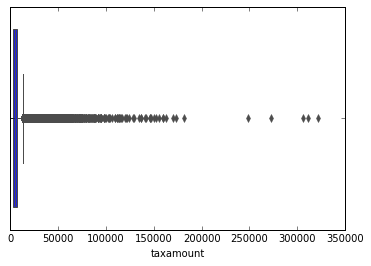

In [19]:
for i, col in enumerate(x_vars):
    series = df[col]
    sns.boxplot(series, orient='h')
    plt.show()

#### BONUS:  Data standardization 
Create a new data frame that is the min-max normalization of the independent variable in the original data frame (+ the original dependent variable). You will normalize each of the numeric independent variables independently, i.e. using the min and max of each variable, not the min/max of the whole dataframe. Why? Regression is very sensitive to difference in units. It will be almost impossible to extract a meaningful linear regression model with such extreme differences in scale. For more context, see: https://medium.com/@rrfd/standardize-or-normalize-examples-in-python-e3f174b65dfc
You will use this dataframe in the future analysis.

### Data Exploration

Goal is to address each of the questions you posed in your planning & brainstorming through visual or statistical analysis.

When you have completed this step, you will have the findings from your analysis that will be used in your final report, the answers to your questions and your customer's questions that will reach the goal. 

#### Split data into training and test datasets

In [20]:
X = df.drop(['logerror'], axis = 1)
y = df[['logerror']]
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.80, random_state=0)

train = pd.concat([X_train, y_train], axis=1)
test = pd.concat([X_test, y_test], axis=1)


/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


#### Create a jointplot for each independent variable (normalized version) with the dependent variable. 

Be sure you have Pearson's r and p-value annotated on each plot.

/usr/local/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/usr/local/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))
/usr/local/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))
/usr/local/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWa

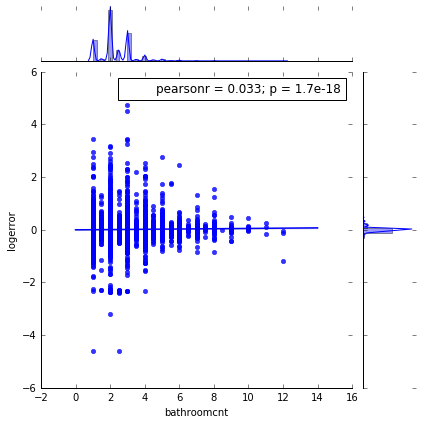

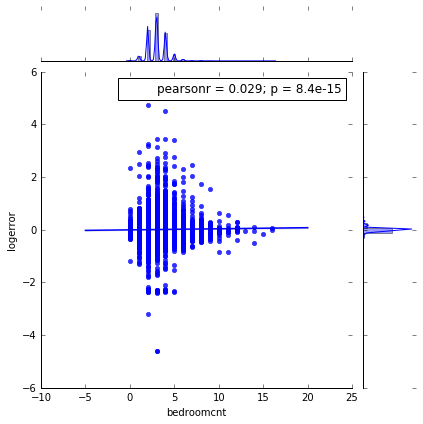

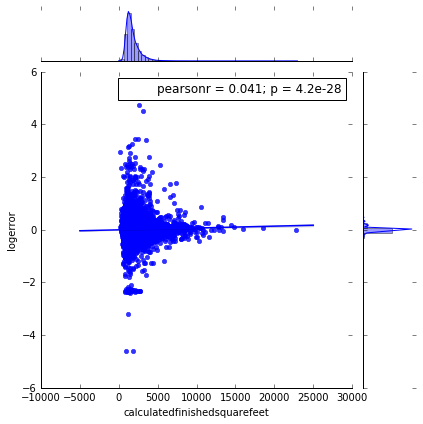

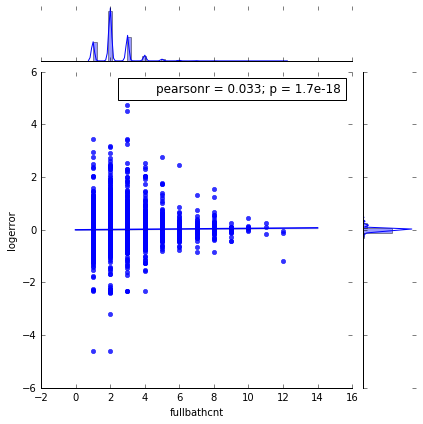

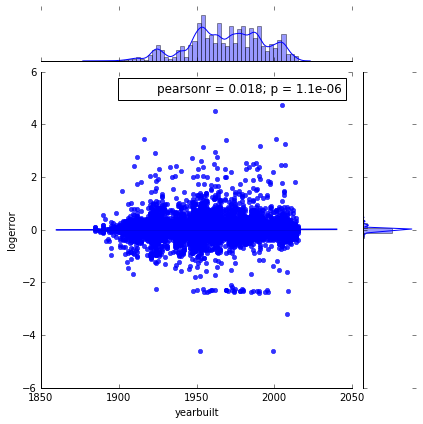

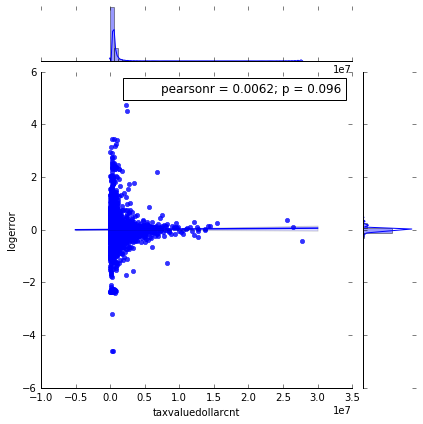

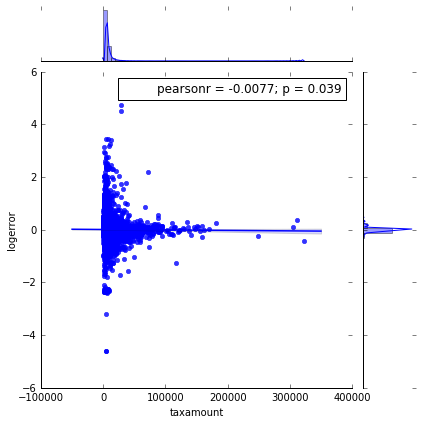

In [21]:
for i, col in enumerate(x_vars):
    j = sns.jointplot(col, 'logerror', data = train, kind='reg')
    j.annotate(stats.pearsonr)

#### Create a feature plot using seaborn's PairGrid() of the interaction between each variable (dependent + independent). 

You may want to use a normalized dataframe (if you did that) or adjust the axis scale (set to logarithmic, e.g) so you can more clearly view the interactions.

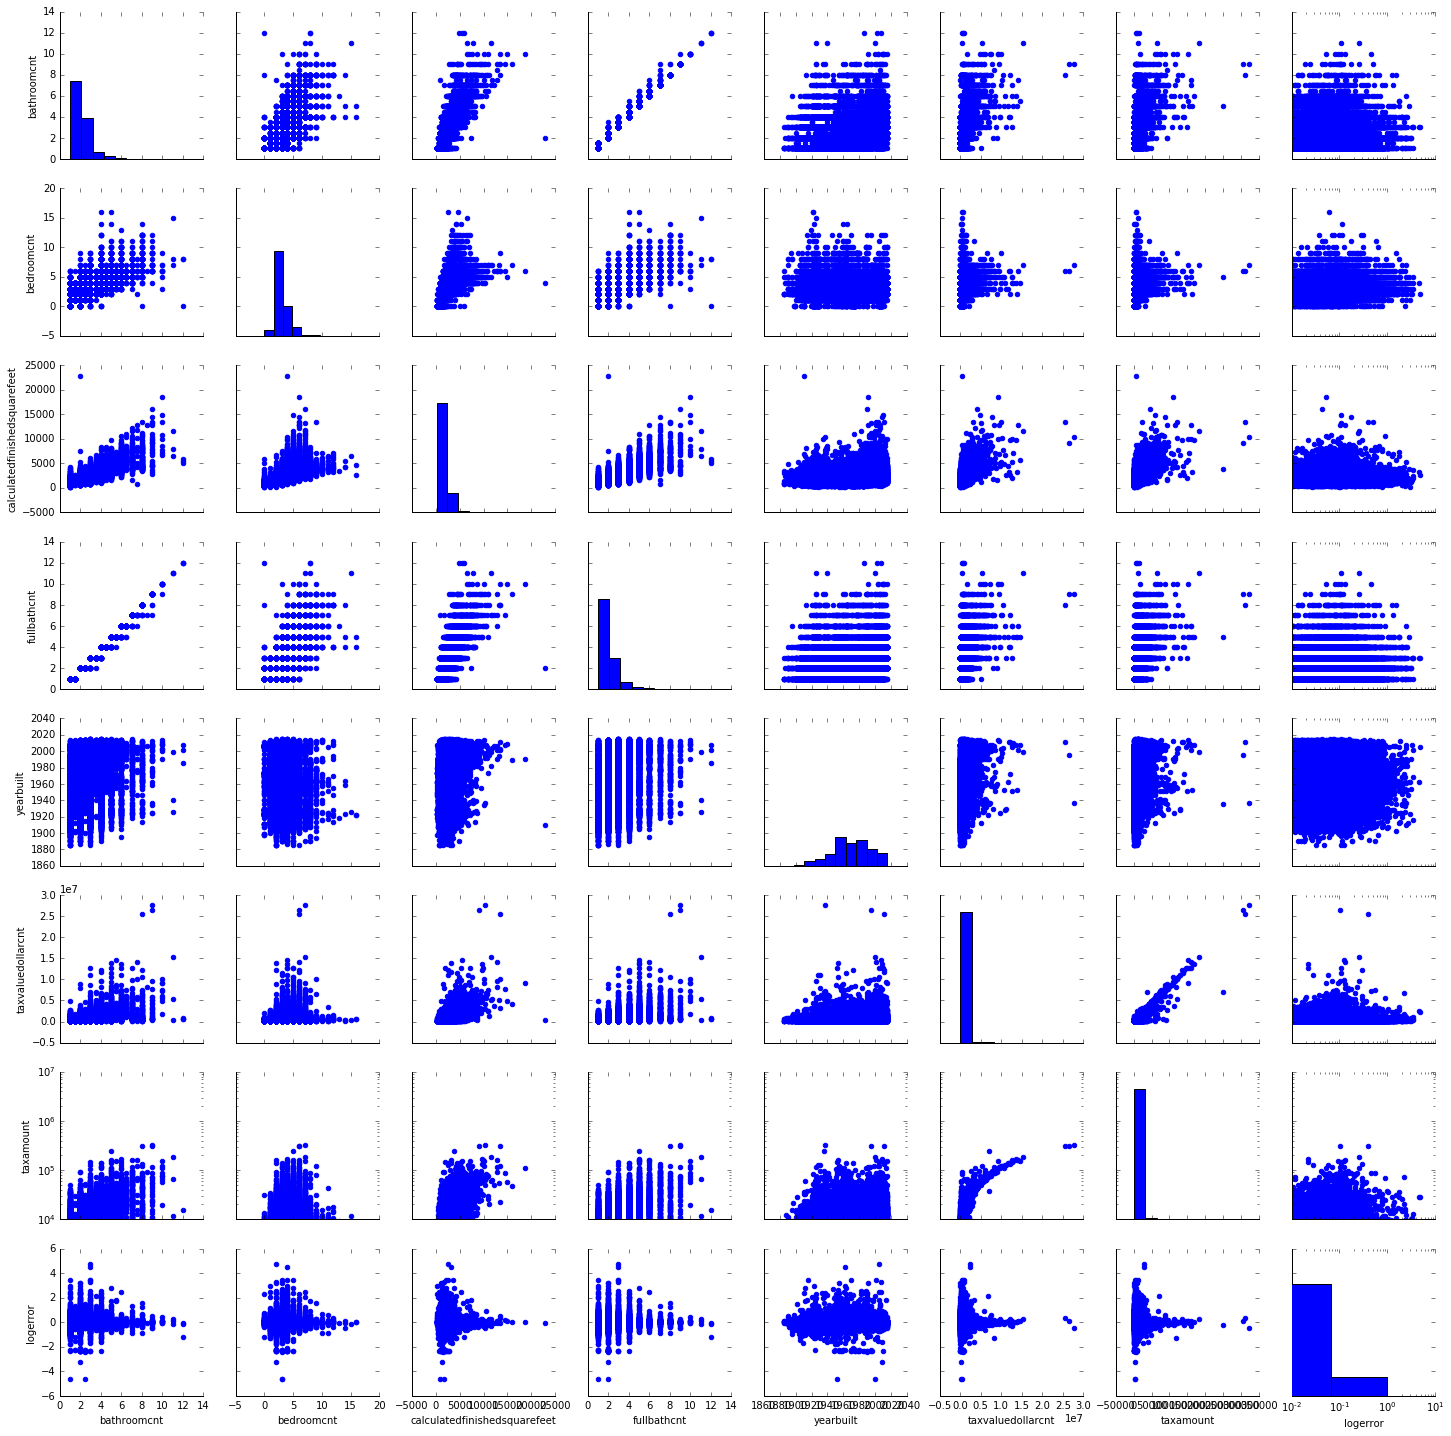

In [22]:
g = sns.PairGrid(train)
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)
plt.xscale('log')
plt.yscale('log')

#### Create a heatmap of the correlation between each variable pair.

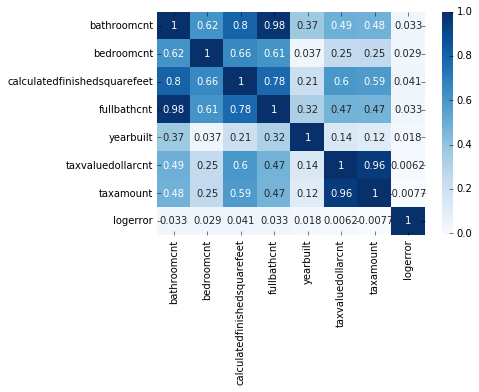

In [23]:
sns.heatmap(train.corr(), cmap='Blues', annot=True)

#### Summarize your conclusions from all of these steps.  

In [24]:
ols_model = sm.OLS(y_train, X_train)
fit = ols_model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               logerror   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     101.2
Date:                Fri, 22 Mar 2019   Prob (F-statistic):          6.77e-148
Time:                        15:42:31   Log-Likelihood:                 31191.
No. Observations:               71194   AIC:                        -6.237e+04
Df Residuals:                   71187   BIC:                        -6.230e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
bathroomcnt                     -0.0081      0.004     -2.263      0.024      -0.015      -0.001
bedroomcnt                      -0.0007      0.001     -0.999      0.318      -0.002       0.001
calculatedfinishedsquarefeet  1.122e-05   1.27e-06      8.819      0.000    8.73e-06    1.37e-05
fullbathcnt                      0.0084      0.003      2.440      0.015       0.002       0.015
yearbuilt                    -9.287e-08   9.37e-07     -0.099      0.921   -1.93e-06    1.74e-06
taxvaluedollarcnt              3.73e-08   3.63e-09     10.285      0.000    3.02e-08    4.44e-08
taxamount                    -3.943e-06   2.92e-07    -13.508      0.000   -4.52e-06   -3.37e-06
==============================================================================
Omnibus:                    48727.927   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         50774318.984
Skew:                           1.879   Prob(JB):                         0.00
Kurtosis:                     133.776   Cond. No.                     6.07e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.07e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Is the logerror significantly different for homes with 3 bedrooms vs those with 5 or more bedrooms? 
Run a t-test to test this difference.

In [25]:
three_bed = train[train.bedroomcnt == 3]
five_bed = train[train.bedroomcnt >= 5]
from scipy.stats import ttest_ind
ttest_ind(three_bed.logerror, five_bed.logerror)

Ttest_indResult(statistic=-6.723772791704029, pvalue=1.7989141114548966e-11)

In [26]:
ols_model = sm.OLS(three_bed.logerror, three_bed.bedroomcnt)
fit = ols_model.fit()
fit.summary()

/usr/local/anaconda3/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1554: RuntimeWarning: invalid value encountered in double_scalars
  return self.ess/self.df_model


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               logerror   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Fri, 22 Mar 2019   Prob (F-statistic):                nan
Time:                        15:42:31   Log-Likelihood:                 14410.
No. Observations:               28320   AIC:                        -2.882e+04
Df Residuals:                   28319   BIC:                        -2.881e+04
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
bedroomcnt     0.0034      0.000     11.679      0.000       0.003       0.004
==============================================================================
Omnibus:                    12085.657   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         30857042.601
Skew:                           0.054   Prob(JB):                         0.00
Kurtosis:                     164.710   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [27]:
ols_model = sm.OLS(five_bed.logerror, five_bed.bedroomcnt)
fit = ols_model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               logerror   R-squared:                       0.017
Model:                            OLS   Adj. R-squared:                  0.017
Method:                 Least Squares   F-statistic:                     94.64
Date:                Fri, 22 Mar 2019   Prob (F-statistic):           3.45e-22
Time:                        15:42:31   Log-Likelihood:                 1398.5
No. Observations:                5494   AIC:                            -2795.
Df Residuals:                    5493   BIC:                            -2788.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
bedroomcnt     0.0044      0.000      9.728      0.000       0.004       0.005
==============================================================================
Omnibus:                     5221.739   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1145954.098
Skew:                           3.987   Prob(JB):                         0.00
Kurtosis:                      73.302   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

0.637882962805798


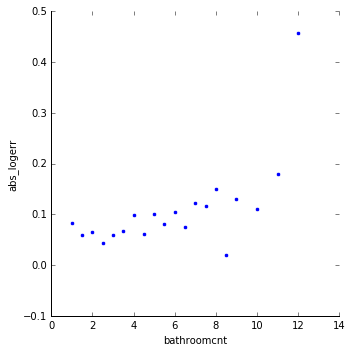

In [28]:
train['abs_logerr'] = train.logerror.apply(fabs)
bathroomcnt_err = train[['abs_logerr', 'bathroomcnt']].groupby('bathroomcnt', as_index=False).mean().sort_values(by='abs_logerr', ascending=False)
bathroomcnt_err
sns.relplot(data = bathroomcnt_err, x='bathroomcnt', y = 'abs_logerr')
print(bathroomcnt_err[['bathroomcnt', 'abs_logerr']].corr().min()[0])

0.8462127434331107


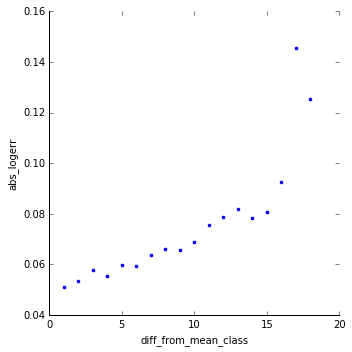

In [29]:
train['price_bin'] = train.taxvaluedollarcnt.apply(get_price_bin)
train['diff_from_mean'] = train.taxvaluedollarcnt.mean() - train.taxvaluedollarcnt
train['diff_from_mean_class'] = train.diff_from_mean.apply(bin_from_diff)
diff_price = train[['abs_logerr', 'diff_from_mean_class']].groupby('diff_from_mean_class', as_index=False).mean().sort_values(by='abs_logerr', ascending=False)
sns.relplot(data = diff_price, x='diff_from_mean_class', y = 'abs_logerr')

# sns.relplot(data = train, x='diff_from_mean_class', y='abs_logerr')
print(diff_price[['diff_from_mean_class', 'abs_logerr']].corr().min()[0])

# price_err = train[['abs_logerr', 'price_bin']].groupby('price_bin', as_index=False).mean().sort_values(by='abs_logerr', ascending=False)
# price_err
# sns.relplot(data = price_err, x='price_bin', y = 'abs_logerr')
# print(price_err[['price_bin', 'abs_logerr']].corr().min()[0])
# sns.relplot(data=train, x='diff_from_mean', y='abs_logerr')


In [32]:
df['abs_logerr'] = df.logerror.apply(fabs)
df['price_bin'] = df.taxvaluedollarcnt.apply(get_price_bin)
df['diff_from_mean'] = df.taxvaluedollarcnt.mean() - df.taxvaluedollarcnt
df['diff_from_mean_class'] = df.diff_from_mean.apply(bin_from_diff)
df_diff_price = df[['abs_logerr', 'diff_from_mean_class']].groupby('diff_from_mean_class', as_index=False).mean().sort_values(by='abs_logerr', ascending=False)
df_diff_price
Xd = df_diff_price[['diff_from_mean_class']]
yd = df_diff_price[['abs_logerr']]
X_traind, X_testd, y_traind, y_testd = train_test_split(X, y, train_size=.80, random_state=0)

train = pd.concat([X_traind, y_traind], axis=1)
test = pd.concat([X_testd, y_testd], axis=1)

In [ ]:
lm_avg_price = LinearRegression()

In [ ]:
train['diff_from_mean'] = train.taxvaluedollarcnt.mean() - train.taxvaluedollarcnt
train['diff_from_mean_class'] = train.diff_from_mean.apply(bin_from_diff)
lm_ten.fit(X_train[['tenure']], y_train)

In [ ]:
bedroomcnt_err = train[['abs_logerr', 'bedroomcnt']].groupby('bedroomcnt', as_index=False).mean().sort_values(by='abs_logerr', ascending=False)
bedroomcnt_err
sns.relplot(data = bedroomcnt_err, x='bedroomcnt', y = 'abs_logerr')
print(bedroomcnt_err[['bedroomcnt', 'abs_logerr']].corr().min()[0])

It looks like there is a greater error in zestimate on homes with 8+ bathrooms compared to those with less.

In [ ]:
train8bath = train[train.bathroomcnt >= 8]
trainlessbath = train[train.bathroomcnt < 8]
print(ttest_ind(trainlessbath.abs_logerr, train8bath.abs_logerr))
print('t value less than -1.96 and pvalue smaller than 0.05.  We can say there is a correlation in error here.')

#### Do the same for another 2 samples you are interested in comparing (e.g. those with 1 bath vs. x baths)

In [ ]:
df.info()

### Data Modeling

#### Feature Engineering & Selection

#### Are there new features you could create based on existing features that might be helpful? 

Come up with at least one possible new feature that is a calculation from 2+ existing variables. 

#### Use statsmodels ordinary least squares to assess the importance of each feature with respect to the target

#### Summarize your conclusions and next steps from your analysis in above. 
What will you try when developing your model? (which features to use/not use/etc)

#### Train & Test Model

#### Fit, predict (in-sample) & evaluate multiple linear regression models to find the best one.

- Make any changes as necessary to improve your model.

- Identify the best model after all training

- Compare the models by plotting the predictions of each model with actual values (see plot right above section 12 in 'Regression in Python' lesson

(the predictions are a 1 x 83 two dimensional matrix, but we want just a single array of predictions. We can use the .ravel method to achieve this.)

`pd.DataFrame({'actual': y_train.final_grade,  
              'lm1': y_pred_lm1.ravel(),  
              'lm2': y_pred_lm2.ravel()})\  
    .melt(id_vars=['actual'], var_name='model', value_name='prediction')\  
    .pipe((sns.relplot, 'data'), x='actual', y='prediction', hue='model')  

plt.plot([60, 100], [60, 100], c='black', ls=':')  
plt.ylim(60, 100)  
plt.xlim(60, 100)  
plt.title('Predicted vs Actual Final Grade')`  

#### Predict & evaluate on out-of-sample data (test)    

- Plot the residuals from your out-of-sample predictions.

- Summarize your expectations about how you estimate this model will perform in production.

In [ ]:
df.head()

In [ ]:
df.head()